# **Layout Parsing starter**

LayoutParser provides various functionalities and deep learning models from different backends.

# Install the LayoutParser library

In [1]:
!pip install -U layoutparser 

Layout Parser also comes with supports for OCR functions. In order to use them, you need to install the OCR utils via:

In [2]:
!pip install layoutparser[ocr]

If we would like to use the Detectron2 models for layout detection, we might need to run the following command:

In [3]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' 

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-j68n8ts6/detectron2_f7c90423ae084fab8ff0862bfa0374ca
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-j68n8ts6/detectron2_f7c90423ae084fab8ff0862bfa0374ca
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done


In [4]:
!git clone https://github.com/Layout-Parser/layout-parser.git
%cd layout-parser/

fatal: destination path 'layout-parser' already exists and is not an empty directory.
/home/user/Desktop/code/test/layout-parser


# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import cv2
import random
import json
import pandas as pd 
from tqdm import tqdm
import matplotlib.pyplot as plt


from pycocotools.coco import COCO
import layoutparser as lp


# Preparing Dataset

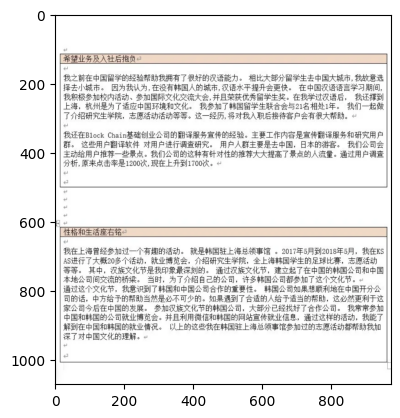

In [9]:
imgdir="/home/user/Desktop/code/test/data"
image = cv2.imread('/home/user/Desktop/code/ocr/data/paper_8.PNG')
plt.imshow(image)

# Model Predictions on Loaded Data

In [17]:
# model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
#                                  extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
#                                  label_map={0: "text", 1: "title", 2: "list", 3:"table", 4:"figure"})

model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "text", 1: "title", 2: "list", 3:"table", 4:"figure"})

# Detecting Layouts

In [18]:
color_map = {
    'text':   'red',
    'title':  'blue',
    'list':   'green',
    'table':  'yellow',
    'figure': 'pink',
}


[TextBlock(block=Rectangle(x_1=28.344249725341797, y_1=165.05349731445312, x_2=950.3283081054688, y_2=325.884521484375), text=None, id=None, type=text, parent=None, next=None, score=0.8475289940834045), TextBlock(block=Rectangle(x_1=17.779266357421875, y_1=339.90716552734375, x_2=941.6674194335938, y_2=452.7178955078125), text=None, id=None, type=text, parent=None, next=None, score=0.5447851419448853), TextBlock(block=Rectangle(x_1=0.0, y_1=661.499755859375, x_2=950.2086181640625, y_2=943.9320678710938), text=None, id=None, type=text, parent=None, next=None, score=0.5421380400657654), TextBlock(block=Rectangle(x_1=0.0, y_1=210.33721923828125, x_2=899.63671875, y_2=1024.89990234375), text=None, id=None, type=table, parent=None, next=None, score=0.5031003952026367)]


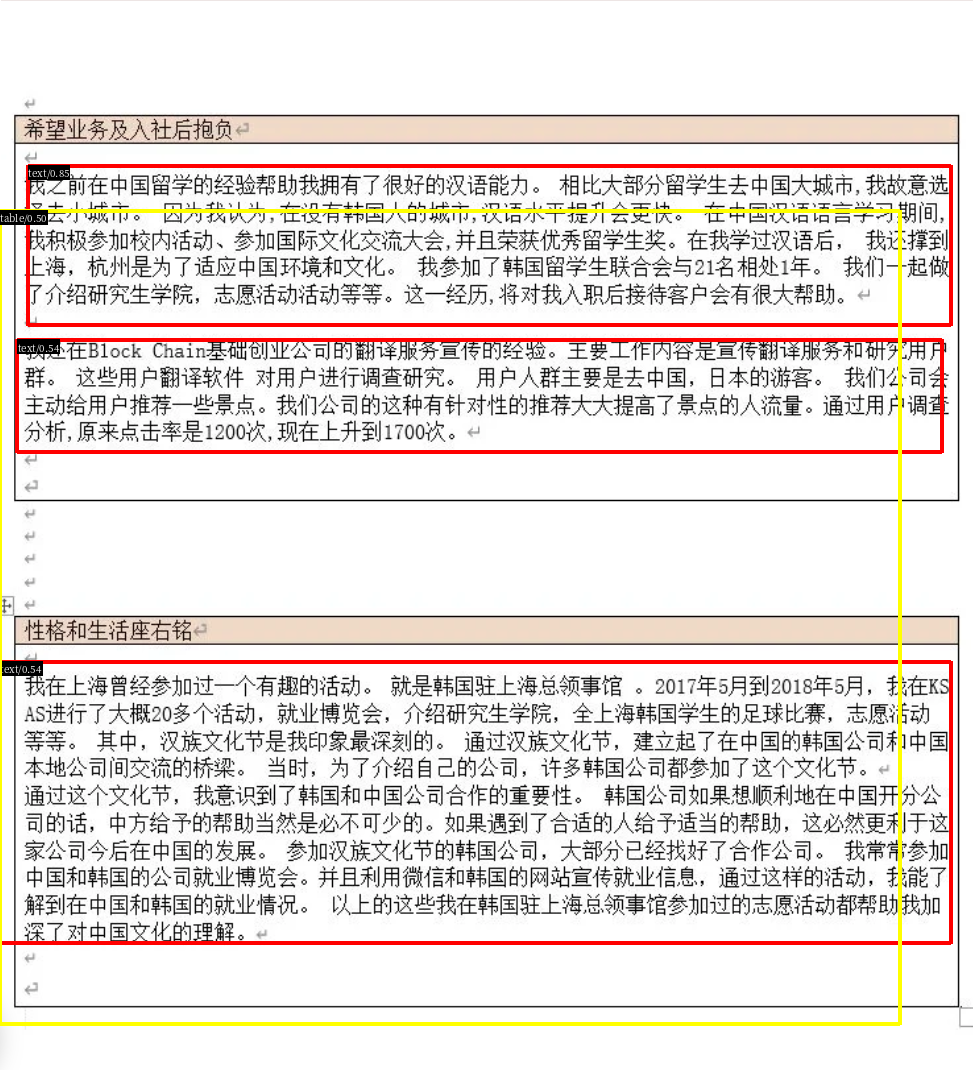

In [19]:
layout_predicted = model.detect(image)
print(layout_predicted._blocks) 
lp.draw_box(image,
              [b.set(id=f'{b.type}/{b.score:.2f}') for b in layout_predicted],
              color_map=color_map,
              show_element_id=True, id_font_size=10,
              id_text_background_color='black',
              id_text_color='white')